# Dados de cirurgia - DF - janeiro de 2018
Com base no aequivoCSV camos analisar os dados eralizadas no DF em janeiro de 2017


como obter os dados:
- Site de Dados abertos do Df -> saúde -> Cirurgias

Arquivo: sih-janeiro-2017-cirurgias-eletiva-e-emergencia

In [1]:
# Importando o pandas
import pandas as pd

# Carregar o arquivo CSV e trabdirna en DaraFrame
# O separador é ';'
# arquivo codificado como cp1252
# Carregar apenas as colunas: 3, 6, 7, 8, 12, 14


df = pd.read_csv('sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv',
                sep = ';', encoding = 'cp1252', usecols = [3, 6, 7, 8, 12, 14])


#Olhando os dados
df.head(2)


Estabelecimento cnes  \
0  6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...   
1  0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL   

  Municipio do estabelecimento Complexidade do Procedimento  \
0            BRASILIA, DF, BR            Média complexidade   
1            BRASILIA, DF, BR            Média complexidade   

  Carater da internaca/ATENDIMENTO  \
0                          Eletivo   
1                         Urgência   

                    Sub grupo procedimento realizado  \
0                   Sub Grupo: 15 - Outras cirurgias   
1  Sub Grupo: 03 - Cirurgia do sistema nervoso ce...   

                             Procedimento realizado  
0                 TRATAMENTO C/ CIRURGIAS MULTIPLAS  
1  DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA

In [2]:
# Renomear as colunas
df.columns = ['Hospital', 'Municipio', 'Complexidade', 'Carater Atendimento', 'Sub Grupo', 'Procedimento']

df.head(3)

Hospital          Municipio  \
0  6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...  BRASILIA, DF, BR    
1  0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL  BRASILIA, DF, BR    
2  0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL  BRASILIA, DF, BR    

         Complexidade Carater Atendimento  \
0  Média complexidade             Eletivo   
1  Média complexidade            Urgência   
2  Média complexidade            Urgência   

                                           Sub Grupo  \
0                   Sub Grupo: 15 - Outras cirurgias   
1  Sub Grupo: 03 - Cirurgia do sistema nervoso ce...   
2                   Sub Grupo: 15 - Outras cirurgias   

                                       Procedimento  
0                 TRATAMENTO C/ CIRURGIAS MULTIPLAS  
1  DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA  
2                 TRATAMENTO C/ CIRURGIAS MULTIPLAS

In [3]:
# Quantas (linhas,colunas)

df.shape

(4862, 6)

In [4]:
# Verificando se existem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 6 columns):
Hospital               4862 non-null object
Municipio              4862 non-null object
Complexidade           4862 non-null object
Carater Atendimento    4862 non-null object
Sub Grupo              4862 non-null object
Procedimento           4862 non-null object
dtypes: object(6)
memory usage: 228.0+ KB


In [5]:
# Analisando quantitativamente as colunas
df.describe()

Hospital          Municipio  \
count                                                4862               4862   
unique                                                 16                 11   
top     0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL  BRASILIA, DF, BR    
freq                                                  735               1923   

              Complexidade Carater Atendimento  \
count                 4862                4862   
unique                   2                   4   
top     Média complexidade            Urgência   
freq                  4353                3794   

                                  Sub Grupo     Procedimento  
count                                  4862             4862  
unique                                   16              495  
top     Sub Grupo: 11 - Cirurgia obstétrica  PARTO CESARIANO  
freq                                   1539             1060

In [6]:
#Qual o nome dos 16 hospitais presente na base
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [7]:
# Quandtas cirugias conteceram em cada i, dps hospitais?
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

In [8]:
#Quantos sub grupos de procedimento no mês de janeiro/2017 ?
df['Sub Grupo'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

In [9]:
# Quantos procedimentos de cada tipo?
df['Procedimento'].value_counts()

PARTO CESARIANO                                                                                         1060
APENDICECTOMIA                                                                                           247
CURETAGEM POS-ABORTAMENTO / PUERPERAL                                                                    207
PARTO CESARIANO EM GESTACAO DE ALTO RISCO                                                                166
LAPAROTOMIA EXPLORADORA                                                                                  135
TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                                        135
ESVAZIAMENTO DE UTERO POS-ABORTO POR ASPIRACAO MANUAL INTRA-UTERINA (AMIU)                               110
COLECISTECTOMIA                                                                                          100
COLECISTECTOMIA VIDEOLAPAROSCOPICA                                                                        73
TORACOSTOMIA COM DR

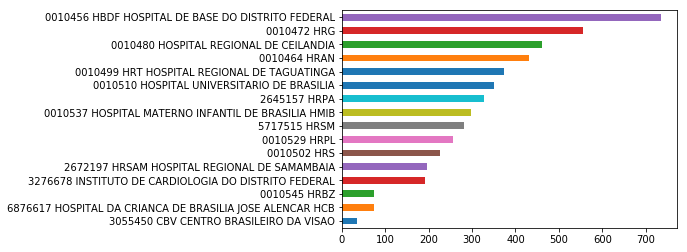

In [10]:
# Plotar graficos de barras da qtde de cirurgias por hospital
# Indicar ao matplotlib para desenhar o grafico nesse notebook
%matplotlib inline

df['Hospital'].value_counts(ascending=True).plot.barh()

In [14]:
# Separar apenas o procedimento parto cesariano
# Para isso vamos selecionar o nosso DataFrame original
# e criar um DataFrame especifico
df_cesariano = df[df['Procedimento'] == 'PARTO CESARIANO']

df_cesariano.head

<bound method NDFrame.head of                                          Hospital            Municipio  \
130                                  0010545 HRBZ  BRAZLANDIA, DF, BR    
131                                  0010545 HRBZ  BRAZLANDIA, DF, BR    
132                                  0010545 HRBZ  BRAZLANDIA, DF, BR    
133                                  0010545 HRBZ  BRAZLANDIA, DF, BR    
141                                  0010545 HRBZ  BRAZLANDIA, DF, BR    
142                                  0010545 HRBZ  BRAZLANDIA, DF, BR    
148   0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA  TAGUATINGA, DF, BR    
149   0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA  TAGUATINGA, DF, BR    
150   0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA  TAGUATINGA, DF, BR    
151   0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA  TAGUATINGA, DF, BR    
152   0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA  TAGUATINGA, DF, BR    
153   0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA  TAGUATINGA, DF, BR    
154     

In [15]:
df['Hospital'].value.counts()

AttributeError: 'Series' object has no attribute 'value'

In [16]:
df_cesariano.shape

(1060, 6)

In [18]:
# refazer o DataFrame de partos cesarianos incluindo procedimentos
# que possuem PARTO CESAROAMP mp mp,e
df_cesariano = df[df['Procedimento'].str.contains('PARTO CESARIANO')]

df_cesariano.shape

(1260, 6)

In [19]:
# Vamos selecionar todos os procedimentos com a palavra PARTO
df_parto = df[df['Procedimento'].str.contains('PARTO')]

df_parto.shape

(1316, 6)

In [20]:
#Va,ps verofocar os tipos de procedimentos
df_parto['Procedimento'].value_counts()

PARTO CESARIANO                                                         1060
PARTO CESARIANO EM GESTACAO DE ALTO RISCO                                166
SUTURA DE LACERACOES DE TRAJETO PELVICO (NO PARTO ANTES DA ADMISSAO)      56
PARTO CESARIANO C/ LAQUEADURA TUBARIA                                     34
Name: Procedimento, dtype: int64